# CatMAP interactive
*2/27/2014 Max Hoffmann* - requires catmap branch from github.com/mhoffman/catmap/tree/feature_inmem

In [1]:
%matplotlib inline
import catmap
import cStringIO
import catmap.analyze
import matplotlib.pyplot as plt
import matplotlib.widgets


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/__init__.py:921: UserWarning:  This call to matplotlib.use() has no effect
because the the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  if warn: warnings.warn(_use_error_msg)


In [2]:
energies_input = """
surface_name	site_name	species_name	formation_energy	bulk_structure	frequencies	other_parameters	reference
None	gas	CO2	2.45	None	[1333,2349,667,667]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
None	gas	CO	2.74	None	[2170]	[]	"Energy Environ. Sci., 3, 1311-1315 (2010)"
None	gas	O2	5.42	None	[1580]	[]	Falsig et al (2012)
Re	111	O	-1.15	fcc	[]	[]	Falsig et al (2012)
Ru	111	O	-0.07	fcc	[]	[]	Falsig et al (2012)
Co	111	O	0.15	fcc	[]	[]	Falsig et al (2012)
Ni	111	O	0.35	fcc	[]	[]	Falsig et al (2012)
Rh	111	O	0.55	fcc	[]	[]	Falsig et al (2012)
Cu	111	O	1.07	fcc	[]	[]	Falsig et al (2012)
Pd	111	O	1.55	fcc	[]	[]	Falsig et al (2012)
Pt	111	O	1.62	fcc	[]	[]	Falsig et al (2012)
Ag	111	O	2.05	fcc	[]	[]	Falsig et al (2012)
Au	111	O	2.61	fcc	[]	[]	Falsig et al (2012)
Ru	111	CO	1.3	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Rh	111	CO	1.34	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Pd	111	CO	1.55	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ni	111	CO	1.63	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Pt	111	CO	1.7	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Cu	111	CO	2.58	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ag	111	CO	2.99	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Au	111	CO	3.04	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ru	111	O-CO	2.53	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Rh	111	O-CO	3.1	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ni	111	O-CO	3.25	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Pt	111	O-CO	4.04	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Cu	111	O-CO	4.18	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Pd	111	O-CO	4.2	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ag	111	O-CO	5.05	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Au	111	O-CO	5.74	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ag	111	O-O	5.98	fcc	[]	[]	Falsig et al (2012)
Au	111	O-O	7.22	fcc	[]	[]	Falsig et al (2012)
Cu	111	O-O	4.74	fcc	[]	[]	Falsig et al (2012)
Pt	111	O-O	5.35	fcc	[]	[]	Falsig et al (2012)
Rh	111	O-O	3.79	fcc	[]	[]	Falsig et al (2012)
Ru	111	O-O	3.34	fcc	[]	[]	Falsig et al (2012)
Pd	111	O-O	5.34	fcc	[]	[]	Falsig et al (2012)
"""

refined_energies_input = """
surface_name	site_name	species_name	formation_energy	bulk_structure	frequencies	other_parameters	reference
None	gas	CO2	2.45	None	[1333,2349,667,667]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
None	gas	CO	2.74	None	[2170]	[]	"Energy Environ. Sci., 3, 1311-1315 (2010)"
None	gas	O2	5.42	None	[1580]	[]	Falsig et al (2012)
Re	111	O	-1.15	fcc	[]	[]	Falsig et al (2012)
Ru	111	O	-0.07	fcc	[]	[]	Falsig et al (2012)
Co	111	O	0.15	fcc	[]	[]	Falsig et al (2012)
Ni	111	O	0.35	fcc	[]	[]	Falsig et al (2012)
Rh	111	O	0.55	fcc	[]	[]	Falsig et al (2012)
Cu	111	O	1.07	fcc	[]	[]	Falsig et al (2012)
Pd	111	O	1.55	fcc	[]	[]	Falsig et al (2012)
Pt	111	O	1.62	fcc	[]	[]	Falsig et al (2012)
Ag	111	O	2.05	fcc	[]	[]	Falsig et al (2012)
Au	111	O	2.61	fcc	[]	[]	Falsig et al (2012)
Ru	111	CO	1.3	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Rh	111	CO	1.34	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Pd	111	CO	1.55	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ni	111	CO	1.63	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Pt	111	CO	1.7	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Cu	111	CO	2.58	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ag	111	CO	2.99	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Au	111	CO	3.04	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ru	111	O-CO	2.53	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Rh	111	O-CO	3.1	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ni	111	O-CO	3.25	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Pt	111	O-CO	4.04	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Cu	111	O-CO	4.18	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Pd	111	O-CO	4.2	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ag	111	O-CO	5.05	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Au	111	O-CO	5.74	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ag	111	O-O	5.98	fcc	[]	[]	Falsig et al (2012)
Au	111	O-O	7.22	fcc	[]	[]	Falsig et al (2012)
Cu	111	O-O	4.74	fcc	[]	[]	Falsig et al (2012)
Pt	111	O-O	5.35	fcc	[]	[]	Falsig et al (2012)
Rh	111	O-O	3.79	fcc	[]	[]	Falsig et al (2012)
Ru	111	O-O	3.34	fcc	[]	[]	Falsig et al (2012)
Pd	111	O-O	5.34	fcc	[]	[]	Falsig et al (2012)
Ru	111	O2	3.15	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Rh	111	O2	3.63	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ni	111	O2	3.76	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Pd	111	O2	4.29	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Cu	111	O2	4.52	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Pt	111	O2	4.56	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ag	111	O2	5.1	fcc	[]	[]	"Angew. Chem. Int. Ed., 47, 4835 (2008)"
Ir	211	CO	0.673	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Re	211	CO	0.753	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Ru	211	CO	0.983	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Rh	211	CO	1.073	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Pt	211	CO	1.113	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Pd	211	CO	1.223	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Ni	211	CO	1.253	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Co	211	CO	1.403	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Fe	211	CO	1.413	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Cu	211	CO	2.283	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Au	211	CO	2.573	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Ag	211	CO	2.873	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Ru	211	O-CO	2.351	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Rh	211	O-CO	2.559	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Co	211	O-CO	2.732	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Ni	211	O-CO	2.768	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Pt	211	O-CO	3.528	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Cu	211	O-CO	3.918	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Pd	211	O-CO	3.992	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Ag	211	O-CO	5.099	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Au	211	O-CO	5.448	fcc	[]	[]	"J. Phys. Chem. C, 113 (24), 10548-10553 (2009)"
Ag	211	O-O	5.34	fcc	[]	[]	Falsig et al (2012)
Au	211	O-O	6.18	fcc	[]	[]	Falsig et al (2012)
Pt	211	O-O	4.9	fcc	[]	[]	Falsig et al (2012)
Pd	211	O-O	4.6	fcc	[]	[]	Falsig et al (2012)
Re	211	O	-1.5	fcc	[]	[]	Falsig et al (2012)
Co	211	O	-0.15	fcc	[]	[]	Falsig et al (2012)
Ru	211	O	-0.1	fcc	[]	[]	Falsig et al (2012)
Ni	211	O	0.18	fcc	[]	[]	Falsig et al (2012)
Rh	211	O	0.28	fcc	[]	[]	Falsig et al (2012)
Cu	211	O	0.93	fcc	[]	[]	Falsig et al (2012)
Pt	211	O	1.32	fcc	[]	[]	Falsig et al (2012)
Pd	211	O	1.58	fcc	[]	[]	Falsig et al (2012)
Ag	211	O	2.11	fcc	[]	[]	Falsig et al (2012)
Au	211	O	2.61	fcc	[]	[]	Falsig et al (2012)
Fe	211	O	-0.73	fcc	[]	[]	"Phys. Rev. Lett. 99, 016105 (2007)"
Ir	211	O	-0.04	fcc	[]	[]	"Phys. Rev. Lett. 99, 016105 (2007)"

"""

In [3]:
model_input = """
#
#Microkinetic model parameters
#

rxn_expressions = [

               '*_s + CO_g -> CO*', 
               '2*_s + O2_g <-> O-O* + *_s -> 2O*',
               'CO* +  O* <-> O-CO* + * -> CO2_g + 2*',

                   ]


surface_names = ['Pt', 'Ag', 'Cu','Rh','Pd','Au','Ru','Ni'] #surfaces to include in scaling (need to have descriptors defined for each)
descriptor_names= ['O_s','CO_s'] #descriptor names

descriptor_ranges = [[-1,3],[-0.5,4]]

resolution = 15

temperature = 500 #Temperature of the reaction

species_definitions = {}
species_definitions['CO_g'] = {'pressure':1.} #define the gas pressures
species_definitions['O2_g'] = {'pressure':1./3.}
species_definitions['CO2_g'] = {'pressure':0}

species_definitions['s'] = {'site_names': ['111'], 'total':1} #define the sites

data_file = 'return'
output_variables = ['rate', 'coverage', 'production_rate']
#
#Parser parameters
#

#input_file = 'energies.txt' #input data
# commented out since we get it from a file object

#
#Scaler parameters
#

gas_thermo_mode = "shomate_gas"
#gas_thermo_mode = "ideal_gas" #Ideal gas approximation
#gas_thermo_mode = "zero_point_gas" #uses zero-point corrections only
#gas_thermo_mode = "fixed_entropy_gas" #assumes entropy of 0.002 eV/K for all gasses except H2 (H2 is 0.00135 eV/K)
#gas_thermo_mode = "frozen_gas" #neglect thermal contributions

adsorbate_thermo_mode = "frozen_adsorbate"
#adsorbate_thermo_mode = "harmonic_adsorbate"
#adsorbate_thermo_mode = "zero_point_adsorbate"

scaling_constraint_dict = {
                           'O_s':['+',0,None],
                           'CO_s':[0,'+',None],
                           'O-CO_s':'initial_state',
                           'O-O_s':'final_state',
                           }


#
#Solver parameters
#

decimal_precision = 350 #precision of numbers involved

tolerance = 1e-250 #all d_theta/d_t's must be less than this at the solution

max_rootfinding_iterations = 100

max_bisections = 3
"""

In [4]:
model = catmap.ReactionModel(setup_file=cStringIO.StringIO(model_input),
                             input_file=cStringIO.StringIO(energies_input))
#model = catmap.ReactionModel(setup_file=cStringIO.StringIO(refined_model_input),
#                             input_file=cStringIO.StringIO(refined_energies_input))

Running Model...
Current T= 600
Current P1 1.0
Current P2 0.0794328234724


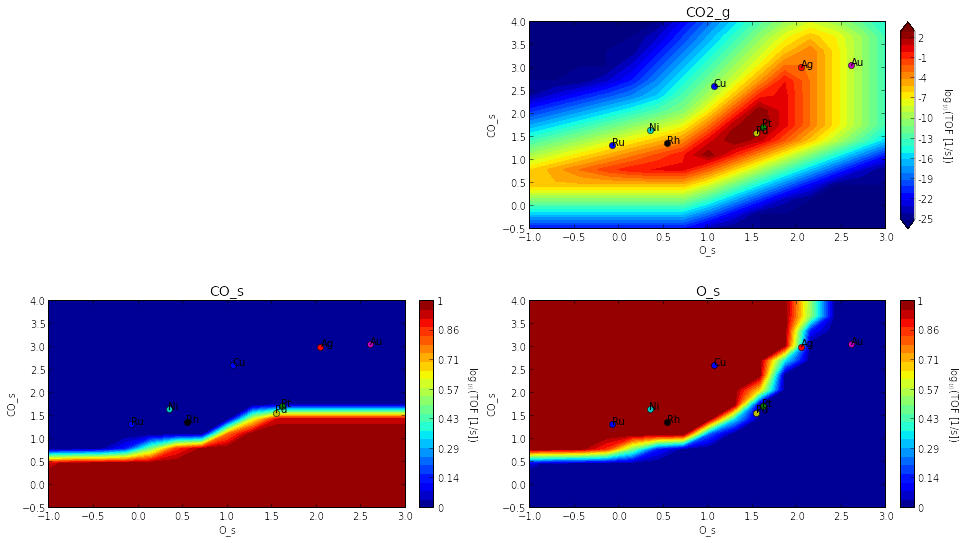

In [5]:
import IPython.html.widgets
import IPython.display
import numpy as np

T, p1, p2 = 600, np.log(1), -1.1


def on_change_T(event, value):
    if type(value) is float:
        global T
        T = value
        #replot(T, p1, p2)


def on_change_p1(event, value):
    if type(value) is float:
        global p1
        p1 = value
        #replot(T, p1, p2)

def on_change_p2(event, value):
    if type(value) is float:
        global p2
        p2 = value
        #replot(T, p1, p2)

def dictify_log(log):
    exec(log)
    return dict(**locals())

def replot(_):
    IPython.display.clear_output(wait=True)
    print 'Running Model...'
    model.temperature = T
    model.species_definitions['O2_g']['pressure'] = 10**p1
    model.species_definitions['CO_g']['pressure'] = 10**p2
    model.gas_pressures = None
    model.coverage_map = []
    data, log = model.run()
    print 'Current T=',model.temperature
    print 'Current P1',model.species_definitions['O2_g']['pressure']
    print 'Current P2',model.species_definitions['CO_g']['pressure']
    
    fig = plt.figure(figsize=(15, 9))
    ax_rate = fig.add_subplot(222)
    ax_COcvg = fig.add_subplot(223)
    ax_Ocvg = fig.add_subplot(224)
    
    model.descriptor_labels = ['CO* binding energy [eV]', 'O* binding energy [eV]']
    
    vm = catmap.analyze.VectorMap(model)
    vm.plot_variable = 'production_rate'
    vm.log_scale = True
    vm.min = 1e-25
    vm.max = 1e3
    vm.include_labels = ['CO2_g']
    vm.plot(ax_list=[ax_rate])
    
    vm = catmap.analyze.VectorMap(model)
    vm.plot_varible = 'coverage'
    vm.include_labels = None
    vm.log_scale = False
    vm.min = 0
    vm.max = 1
    vm.plot(ax_list=[ax_COcvg,ax_Ocvg])
    
    for ax in fig.axes[-3:]:
        ax.set_ylabel('log$_{10}$(TOF [1/s])',rotation=-90)



    
# setup layout
container = IPython.html.widgets.Box()
r1_container = IPython.html.widgets.Box()
r2_container = IPython.html.widgets.Box()
IPython.display.display(container)
T_slider = IPython.html.widgets.FloatSlider(min=300, max=1000, value=T, description='Temperature [K]');# IPython.display.display(T_slider)
T_slider.on_trait_change(on_change_T)


p1_slider = IPython.html.widgets.FloatSlider(min=-9, max=9, value=p1, description='log10(O2 pressure [bar])');# IPython.display.display(p1_slider)
p1_slider.on_trait_change(on_change_p1)

p2_slider = IPython.html.widgets.FloatSlider(min=-9, max=9, value=p2, description='log10(CO pressure [bar])');# IPython.display.display(p2_slider)
p2_slider.on_trait_change(on_change_p2)

update_button = IPython.html.widgets.Button(description='Update!'); #IPython.display.display(update_button)
update_button.on_click(replot)

r1_container.children += (p1_slider, p2_slider,T_slider,);
r2_container.children += (update_button,); 
container.children += (r1_container, r2_container)
#container.remove_class('vbox'); container.add_class('hbox')


TODO
- how to correctly account for partial pressure in model input
- what do do about kinks in coverages/rates?
- how to interpolate rates and coverages correctly
- fix reaction color bar at reasonable limits
- add axes labels and units
